In [17]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [11]:
chroms = [str(x) for x in range(1, 23)]
#chroms = ['X']
deletion_dir = '../deletions_ihart_asym_dd'
data_dir = '../split_gen_ihart'
phase_dir = '../phased_ihart'

In [22]:
pos = np.load('../split_gen_spark/chr.20.gen.coordinates.npy')
print(pos.shape)

(14888, 4)


In [12]:
with open('%s/chr.1.gen.samples.txt' % data_dir, 'r') as f:
    sample_id_to_index = dict([(x.strip(), i) for i, x in enumerate(f)])

In [14]:
# load data
deletions = []
has_deletion = []

for chrom in chroms:
    print(chrom, end=' ')
    with open('%s/chr.%s.collections.json' % (deletion_dir, chrom), 'r') as f:
        collections = json.load(f)
        for c in collections:
            deletions.append(c['deletion'])
            
            maternal_deletions = sum([[sample_id_to_index[x] for x in d['trans']] for d in c['matches'] if d['is_mat']], [])
            paternal_deletions = sum([[sample_id_to_index[x] for x in d['trans']] for d in c['matches'] if d['is_pat']], [])
            
            if len(maternal_deletions) > 0:
                deletions.append((c['deletion'], True))
                has_deletion.append(maternal_deletions)
            if len(paternal_deletions) > 0:
                deletions.append((c['deletion'], False))
                has_deletion.append(paternal_deletions)

        

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 

In [15]:
X = np.zeros((len(sample_id_to_index), len(deletions)), dtype=bool)
for i, indices in enumerate(has_deletion):
    X[indices, i] = True

X = X[np.sum(X, axis=1)>0, :]
print(X.shape)

(1924, 405492)


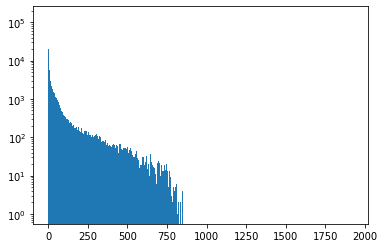

In [20]:
plt.hist(np.sum(X, axis=0), bins=np.arange(0, X.shape[0]), log=True)
plt.show()